# Quantum Computing: Lab 3

## Grover Search

In this Lab we will see different ways of implementing Grover's algorithm. Remember, we always start in an equal superposition. Afterwards we have $\sqrt{N}$ Grover iterations. A Grover iteration consists of an Oracle and the Diffuser. The latter consists of an unitary gate, which muliplies all states but $|0_n\rangle$ by $-1$, surrounded by Hadamard gates. Here is a schematic representing 

![Grover Algorithm](resources/grover_circuit_high_level.png)
(Source: https://qiskit.org/textbook/ch-algorithms/grover.html)

__Exercise 1:__ Create four Circuits with the Hadamards in the beginning and the four different oracles. Try to come up with the right combination of gates for the Oracles from the following set of gates: CZ, CNOT, X, Z. Use the Statevector Simulator to verify that the correct state is marked.

Hints: The matrix for CZ is $\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

One of the oracles might seem impossible to create with the given gate set, however focus on giving the state a different sign than the others and not so much on marking the state with a minus one.

In [1]:
%matplotlib inline

import qiskit
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

from qiskit.providers.aer.noise import NoiseModel

import matplotlib.pyplot as plt
import numpy as np

In [2]:
statevector_backend = Aer.get_backend('statevector_simulator')
qasm_backend = Aer.get_backend('qasm_simulator')

In [3]:
# Your code for state |00>

circ_00 = QuantumCircuit(2)

circ_00.h([0, 1])

circ_00.z([0, 1])
circ_00.cz(0, 1)

job_00 = execute(circ_00, statevector_backend)
result_00 = job_00.result()

print(result_00.get_statevector())

[ 0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]


In [4]:
# Your code for state |01>

circ_01 = QuantumCircuit(2)

circ_01.h([0, 1])

circ_01.cz(0, 1)
circ_01.z(0)

job_01 = execute(circ_01, statevector_backend)
result_01 = job_01.result()

print(result_01.get_statevector())

[ 0.5+0.j -0.5+0.j  0.5+0.j  0.5-0.j]


In [5]:
# Your code for state |10>

circ_10 = QuantumCircuit(2)

circ_10.h([0, 1])

circ_10.cz(0, 1)
circ_10.z(1)

job_10 = execute(circ_10, statevector_backend)
result_10 = job_10.result()

print(result_10.get_statevector())

[ 0.5+0.j  0.5+0.j -0.5+0.j  0.5-0.j]


In [6]:
# Your code for state |11>

circ_11 = QuantumCircuit(2)

circ_11.h([0, 1])

circ_11.cz(0, 1)

job_11 = execute(circ_11, statevector_backend)
result_11 = job_11.result()

print(result_11.get_statevector())

[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]


__Exercise 2:__ Finish the circuits of _Exercise 1_ with the Diffuser. Again simulate all circuits with the statevector simulator. Is something cathing your eye?

In [7]:
diffuser_circ = QuantumCircuit(2)

diffuser_circ.h([0, 1])

diffuser_circ.z([0, 1])
diffuser_circ.cz(0, 1)

diffuser_circ.h([0, 1])

diffuser_gate = diffuser_circ.to_gate()


circ_00.append(diffuser_gate, [0, 1])

job_00 = execute(circ_00, statevector_backend)
result_00 = job_00.result()

print(result_00.get_statevector())

[-1.00000000e+00+2.44929360e-16j  1.57009246e-16-4.35788200e-32j
  2.22044605e-16-4.93038066e-32j  1.57009246e-16-2.61472920e-32j]


In [8]:
circ_01.append(diffuser_gate, [0, 1])

job_01 = execute(circ_01, statevector_backend)
result_01 = job_01.result()

print(result_01.get_statevector())

[-3.92523115e-17+2.6147292e-32j  1.00000000e+00-2.4492936e-16j
 -3.92523115e-17+2.6147292e-32j -1.11022302e-16+1.2246468e-16j]


In [9]:
circ_10.append(diffuser_gate, [0, 1])

job_10 = execute(circ_10, statevector_backend)
result_10 = job_10.result()

print(result_10.get_statevector())

[ 7.49879891e-33+0.00000000e+00j -3.74939946e-33+3.69778549e-32j
  1.00000000e+00-2.44929360e-16j  1.87469973e-32+1.22464680e-16j]


In [10]:
circ_11.append(diffuser_gate, [0, 1])

job_11 = execute(circ_11, statevector_backend)
result_11 = job_11.result()

print(result_11.get_statevector())

[1.96261557e-16-3.69778549e-32j 2.22044605e-16+1.22464680e-16j
 1.96261557e-16+1.22464680e-16j 1.00000000e+00-2.44929360e-16j]


__Exercise 3__: Use the `UnitaryGate` from last lecture to create a Grover circuit for finding the state 110. Run the complete circuit for 1 to 4 iterations on the qasm simulator. How many Grover Iterations do we need?

In [11]:
u_matrix_oracle = np.array([[ 1, 0, 0, 0, 0, 0, 0, 0], 
                            [ 0, 1, 0, 0, 0, 0, 0, 0], 
                            [ 0, 0, 1, 0, 0, 0, 0, 0], 
                            [ 0, 0, 0, 1, 0, 0, 0, 0], 
                            [ 0, 0, 0, 0, 1, 0, 0, 0], 
                            [ 0, 0, 0, 0, 0, 1, 0, 0], 
                            [ 0, 0, 0, 0, 0, 0,-1, 0], 
                            [ 0, 0, 0, 0, 0, 0, 0, 1]])

u_matrix_diff =  np.array([[ 1, 0, 0, 0, 0, 0, 0, 0], 
                           [ 0,-1, 0, 0, 0, 0, 0, 0], 
                           [ 0, 0,-1, 0, 0, 0, 0, 0], 
                           [ 0, 0, 0,-1, 0, 0, 0, 0], 
                           [ 0, 0, 0, 0,-1, 0, 0, 0], 
                           [ 0, 0, 0, 0, 0,-1, 0, 0], 
                           [ 0, 0, 0, 0, 0, 0,-1, 0], 
                           [ 0, 0, 0, 0, 0, 0, 0,-1]])

u_oracle_gate = qiskit.extensions.UnitaryGate(u_matrix_oracle, label='oracle')
u_diff_gate = qiskit.extensions.UnitaryGate(u_matrix_diff, label='diff')

diff_circ = QuantumCircuit(3)

diff_circ.h([0, 1, 2])
diff_circ.append(u_diff_gate, [0, 1, 2])
diff_circ.h([0, 1, 2])

diff_gate = diff_circ.to_gate()

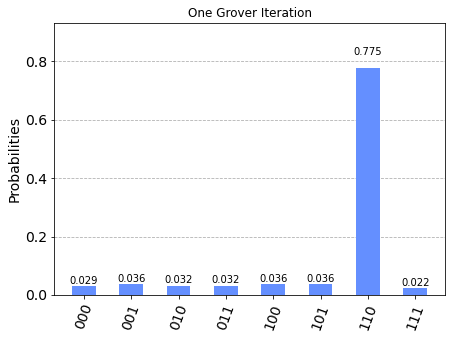

In [12]:
circ_110 = QuantumCircuit(3)

circ_110.h([0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])

circ_110.measure_all()

job_110 = execute(circ_110, qasm_backend, shots=1024)
result_110 = job_110.result()

plot_histogram(result_110.get_counts(), title='One Grover Iteration')

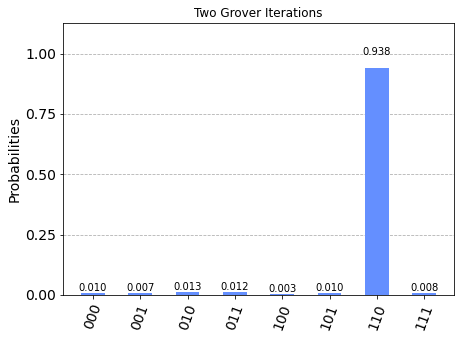

In [13]:
circ_110 = QuantumCircuit(3)

circ_110.h([0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])

circ_110.measure_all()

job_110 = execute(circ_110, qasm_backend, shots=1024)
best_result_110 = job_110.result()

plot_histogram(best_result_110.get_counts(), title='Two Grover Iterations')

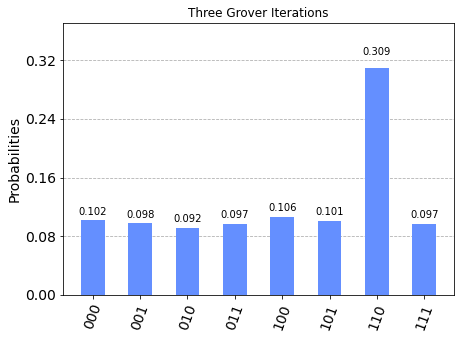

In [14]:
circ_110 = QuantumCircuit(3)

circ_110.h([0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])

circ_110.measure_all()

job_110 = execute(circ_110, qasm_backend, shots=1024)
result_110 = job_110.result()

plot_histogram(result_110.get_counts(), title='Three Grover Iterations')

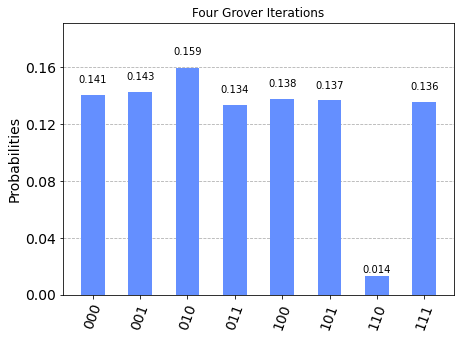

In [15]:
circ_110 = QuantumCircuit(3)

circ_110.h([0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])

circ_110.measure_all()

job_110 = execute(circ_110, qasm_backend, shots=1024)
result_110 = job_110.result()

plot_histogram(result_110.get_counts(), title='Four Grover Iterations')

__Exercise 4:__ Run the best performing $|110\rangle$ circuit in the qasm simulator while simulating `ibmq_athens` and compare it to the results without the noise model.

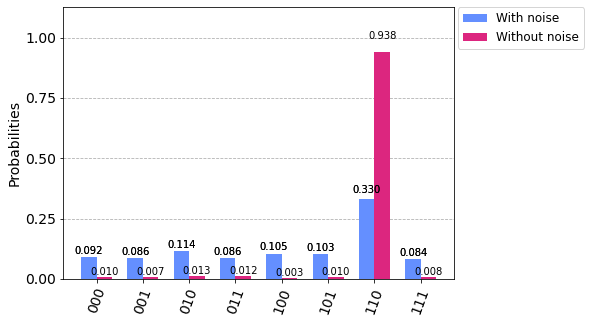

In [16]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

device_backend = provider.backend.ibmq_athens

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map

# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)

# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

circ_110 = QuantumCircuit(3)

circ_110.h([0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])
circ_110.append(u_oracle_gate, [0, 1, 2])
circ_110.append(diff_gate, [0, 1, 2])

circ_110.measure_all()

# Execute noisy simulation and get counts
result_noise = execute(circ_110, qasm_backend,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts()
plot_histogram([counts_noise, best_result_110.get_counts()], legend=['With noise', 'Without noise'])

__Exercise 5:__ What would be the maximum amount of marked states for 3 qubits and how many iterations would we need? (Solve this experimentally!) Then compare the best solution again with a noisy simulation.

In [17]:
u_matrix_oracle = np.array([[ 1, 0, 0, 0, 0, 0, 0, 0], 
                            [ 0, 1, 0, 0, 0, 0, 0, 0], 
                            [ 0, 0,-1, 0, 0, 0, 0, 0], 
                            [ 0, 0, 0, 1, 0, 0, 0, 0], 
                            [ 0, 0, 0, 0, 1, 0, 0, 0], 
                            [ 0, 0, 0, 0, 0,-1, 0, 0], 
                            [ 0, 0, 0, 0, 0, 0, 1, 0], 
                            [ 0, 0, 0, 0, 0, 0, 0,-1]])

u_oracle_gate = qiskit.extensions.UnitaryGate(u_matrix_oracle, label='oracle')

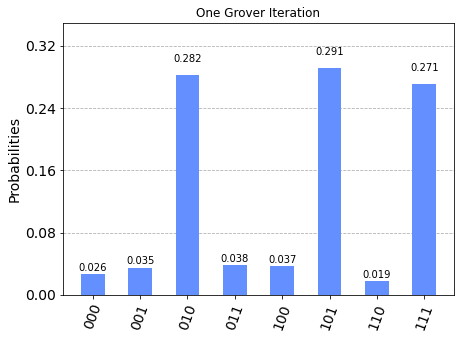

In [18]:
circ = QuantumCircuit(3)

circ.h([0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])

circ.measure_all()

job = execute(circ, qasm_backend, shots=1024)
result = job.result()

plot_histogram(result.get_counts(), title='One Grover Iteration')

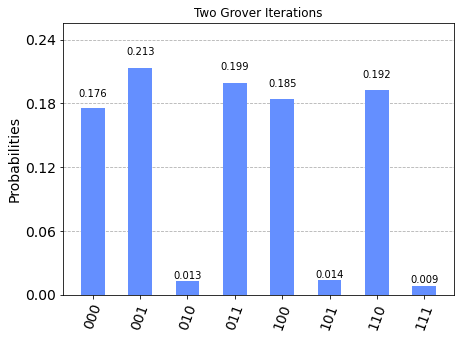

In [19]:
circ = QuantumCircuit(3)

circ.h([0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])

circ.measure_all()

job = execute(circ, qasm_backend, shots=1024)
result = job.result()

plot_histogram(result.get_counts(), title='Two Grover Iterations')

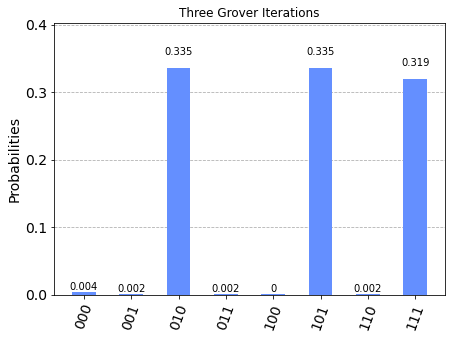

In [20]:
circ = QuantumCircuit(3)

circ.h([0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])
circ.append(u_oracle_gate, [0, 1, 2])
circ.append(diff_gate, [0, 1, 2])

circ.measure_all()

job = execute(circ, qasm_backend, shots=1024)
result = job.result()

plot_histogram(result.get_counts(), title='Three Grover Iterations')

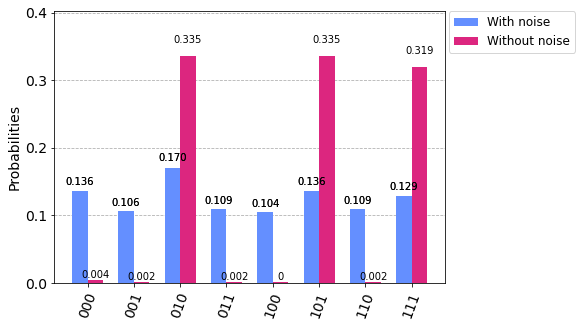

In [21]:
# Execute noisy simulation and get counts
result_noise = execute(circ, qasm_backend,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts()
plot_histogram([counts_noise, result.get_counts()], legend=['With noise', 'Without noise'])

Marking more than one state (i.e. an unknown number of states) and experimentally finding the solution is part of Grover Adaptive Search (https://arxiv.org/abs/1912.04088). This together with Quantum Dictionaries (https://arxiv.org/abs/1907.11513) gives us a first algorithm to solve combinatorial optimization problems. However, as you have seen in the last exercise, this algorithm isn't good on current quantum devices. Thus we will see better performing algorithms in Lab 5.